# This notebook demonstrates how to:

1. Collect Reddit data using PMAW/PRAW
2. Do sentiment analysis using VADER
3. Do sentiment analysis using EMPATH 

#### Credit: Darshan Satra (dsatra@iu.edu)



## 1. Script to collect data from Reddit using PMAW/PRAW

For installing praw:

In [ ]:
#pip install praw

### How to get Reddit Developer Credentials

1. Go to www.reddit.com/prefs/apps/ or https://old.reddit.com/prefs/apps

2. Create a new script application.

3. Use the following value for Redirect uri: http://localhost:8080

4. Refer to https://praw.readthedocs.io/en/stable/getting_started/authentication.html#application-only-client-credentials-flow to understand the pieces of information needed for authentication (e.g. client_id, client_secret, etc.).


### A script for getting submissions from a particular subreddit between two dates and creating a dataframe out of it.

In [8]:
import praw
import pandas as pd
from datetime import datetime, timedelta

# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='NMKC3fTL-TdceOD-LS15iA',
                     client_secret='No1nyecxvPrwCmjXcnEx5Tsj4NuMAg',
                     user_agent='sahil',
                     username='LandscapeOdd4499',
                     password='Sahil@Feb16')
 

### A script for getting X number of Reddit comments under a specific post

In [9]:
import praw
import pandas as pd

post_id = 'r77kqg'
num_comments = 250

# Retrieve the submission by its ID
post = reddit.submission(id=post_id)

# Replace MoreComments objects with actual comments
post.comments.replace_more(limit=None)
comments = post.comments.list()

# Initialize an empty list to store comment data
data = []

# Initialize a counter for comments processed
comments_processed = 0

# Iterate through the comments and extract relevant information
for comment in comments:
    author = comment.author.name if comment.author else '[deleted]'
    text = comment.body
    date = comment.created_utc
    score = comment.score
    data.append([author, text, date, score])
    
    # Increment the counter
    comments_processed += 1
    
    # Break the loop if the desired number of comments is reached
    if comments_processed >= num_comments:
        break

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=['Author', 'Text', 'Date', 'Score'])

# Write the DataFrame to a CSV file
df.to_csv('redditADHD.csv', index=False)

In [1]:
import string
import pandas as pd
string.punctuation
df = pd.read_csv("redditADHD.csv")
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['Text'].apply(lambda x:remove_punctuation(x))
df.head()

C:\Users\sahil\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Author,Text,Date,Score,clean_msg
0,ChipTheOcelot,Not being able to do something even if you nee...,1.638468e+09,731,Not being able to do something even if you nee...
1,HorrorLine,Constant internal monologue interrupts studyin...,1.638452e+09,3627,Constant internal monologue interrupts studyin...
2,Oh-OkayThen,Anybody else with adhd ever have that feeling ...,1.638469e+09,1638,Anybody else with adhd ever have that feeling ...
3,ThreeToTheHead,Holding patterns. For example if I work at 12...,1.638452e+09,2732,Holding patterns For example if I work at 123...
4,Kabrallen,Time. It's weird. Telling me about an appointm...,1.638466e+09,1166,Time Its weird Telling me about an appointment...


In [2]:
import string
import pandas as pd
import re

df = pd.read_csv("redditADHD.csv")

def remove_punctuation_and_urls(text):
    # Remove punctuation
    punctuation_free = "".join([char for char in text if char not in string.punctuation])
    
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_removed = re.sub(url_pattern, '', punctuation_free)
    
    return url_removed

# Store the punctuation and URL-free text
df['clean_msg'] = df['Text'].apply(remove_punctuation_and_urls)
df.head()


,Author,Text,Date,Score,clean_msg
0,ChipTheOcelot,Not being able to do something even if you nee...,1.638468e+09,731,Not being able to do something even if you nee...
1,HorrorLine,Constant internal monologue interrupts studyin...,1.638452e+09,3627,Constant internal monologue interrupts studyin...
2,Oh-OkayThen,Anybody else with adhd ever have that feeling ...,1.638469e+09,1638,Anybody else with adhd ever have that feeling ...
3,ThreeToTheHead,Holding patterns. For example if I work at 12...,1.638452e+09,2732,Holding patterns For example if I work at 123...
4,Kabrallen,Time. It's weird. Telling me about an appointm...,1.638466e+09,1166,Time Its weird Telling me about an appointment...


In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

# Function to remove punctuation
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

# Applying punctuation removal and storing the cleaned text
df['clean_msg'] = df['Text'].apply(lambda x: remove_punctuation(x))

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Applying VADER sentiment analysis on cleaned text
df['sentiment_scores'] = df['clean_msg'].apply(lambda x: sid.polarity_scores(x))

# Extracting compound scores (overall sentiment) from sentiment_scores
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Displaying the DataFrame with sentiment scores
df.head(10)


,Author,Text,Date,Score,clean_msg,sentiment_scores,compound_score
0,ChipTheOcelot,Not being able to do something even if you nee...,1.638468e+09,731,Not being able to do something even if you nee...,"{'neg': 0.087, 'neu': 0.876, 'pos': 0.038, 'co...",-0.7576
1,HorrorLine,Constant internal monologue interrupts studyin...,1.638452e+09,3627,Constant internal monologue interrupts studyin...,"{'neg': 0.176, 'neu': 0.687, 'pos': 0.137, 'co...",-0.1280
2,Oh-OkayThen,Anybody else with adhd ever have that feeling ...,1.638469e+09,1638,Anybody else with adhd ever have that feeling ...,"{'neg': 0.116, 'neu': 0.778, 'pos': 0.106, 'co...",-0.3400
3,ThreeToTheHead,Holding patterns. For example if I work at 12...,1.638452e+09,2732,Holding patterns For example if I work at 123...,"{'neg': 0.029, 'neu': 0.971, 'pos': 0.0, 'comp...",-0.0772
4,Kabrallen,Time. It's weird. Telling me about an appointm...,1.638466e+09,1166,Time Its weird Telling me about an appointment...,"{'neg': 0.099, 'neu': 0.857, 'pos': 0.045, 'co...",-0.3612
5,[deleted],[deleted],1.638460e+09,889,deleted,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,Mangobunny98,Hyper fixation. If I'm into something it's sta...,1.638462e+09,854,Hyper fixation If Im into something its stayin...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
7,techie_boy69,"Life is bloody hard on so many levels, the cra...",1.638453e+09,917,Life is bloody hard on so many levels the craz...,"{'neg': 0.219, 'neu': 0.678, 'pos': 0.103, 'co...",-0.9573
8,[deleted],There’s a profound mental discomfort when doin...,1.638471e+09,345,There’s a profound mental discomfort when doin...,"{'neg': 0.136, 'neu': 0.816, 'pos': 0.048, 'co...",-0.9729
9,lMurv,1. Hypersensitivity\nFor example Labels in clo...,1.638452e+09,580,1 Hypersensitivity\nFor example Labels in clos...,"{'neg': 0.149, 'neu': 0.697, 'pos': 0.155, 'co...",0.3551


In [3]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

# Function to remove punctuation
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

# Function to get sentiment label
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Applying punctuation removal and storing the cleaned text
df['clean_msg'] = df['Text'].apply(lambda x: remove_punctuation(x))

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Applying VADER sentiment analysis on cleaned text
df['sentiment_scores'] = df['clean_msg'].apply(lambda x: sid.polarity_scores(x))

# Extracting compound scores (overall sentiment) from sentiment_scores
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Applying sentiment label
df['sentiment_label'] = df['compound_score'].apply(get_sentiment_label)

# Displaying the DataFrame with sentiment scores and labels
df.head(10)

,Author,Text,Date,Score,clean_msg,sentiment_scores,compound_score,sentiment_label
0,ChipTheOcelot,Not being able to do something even if you nee...,1.638468e+09,731,Not being able to do something even if you nee...,"{'neg': 0.087, 'neu': 0.876, 'pos': 0.038, 'co...",-0.7576,Negative
1,HorrorLine,Constant internal monologue interrupts studyin...,1.638452e+09,3627,Constant internal monologue interrupts studyin...,"{'neg': 0.176, 'neu': 0.687, 'pos': 0.137, 'co...",-0.1280,Negative
2,Oh-OkayThen,Anybody else with adhd ever have that feeling ...,1.638469e+09,1638,Anybody else with adhd ever have that feeling ...,"{'neg': 0.116, 'neu': 0.778, 'pos': 0.106, 'co...",-0.3400,Negative
3,ThreeToTheHead,Holding patterns. For example if I work at 12...,1.638452e+09,2732,Holding patterns For example if I work at 123...,"{'neg': 0.029, 'neu': 0.971, 'pos': 0.0, 'comp...",-0.0772,Negative
4,Kabrallen,Time. It's weird. Telling me about an appointm...,1.638466e+09,1166,Time Its weird Telling me about an appointment...,"{'neg': 0.099, 'neu': 0.857, 'pos': 0.045, 'co...",-0.3612,Negative
5,[deleted],[deleted],1.638460e+09,889,deleted,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,Mangobunny98,Hyper fixation. If I'm into something it's sta...,1.638462e+09,854,Hyper fixation If Im into something its stayin...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
7,techie_boy69,"Life is bloody hard on so many levels, the cra...",1.638453e+09,917,Life is bloody hard on so many levels the craz...,"{'neg': 0.219, 'neu': 0.678, 'pos': 0.103, 'co...",-0.9573,Negative
8,[deleted],There’s a profound mental discomfort when doin...,1.638471e+09,345,There’s a profound mental discomfort when doin...,"{'neg': 0.136, 'neu': 0.816, 'pos': 0.048, 'co...",-0.9729,Negative
9,lMurv,1. Hypersensitivity\nFor example Labels in clo...,1.638452e+09,580,1 Hypersensitivity\nFor example Labels in clos...,"{'neg': 0.149, 'neu': 0.697, 'pos': 0.155, 'co...",0.3551,Positive


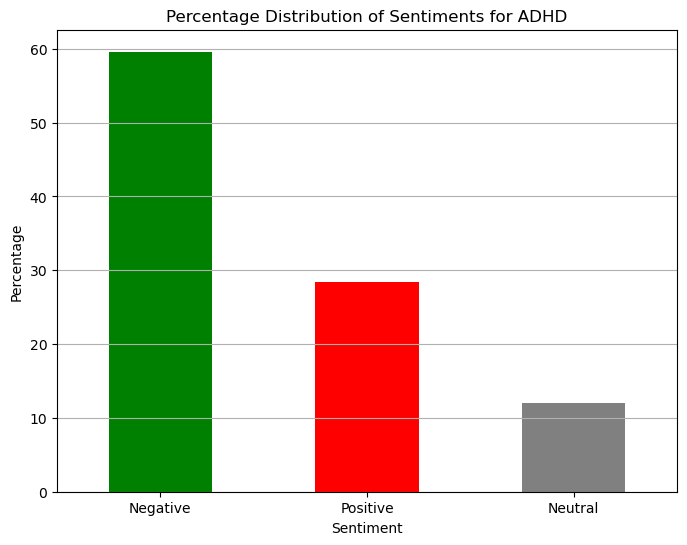


Percentage Distribution of Sentiments:
sentiment
Negative    59.6
Positive    28.4
Neutral     12.0
Name: proportion, dtype: float64


In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import matplotlib.pyplot as plt


# Function to remove punctuation
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

# Applying punctuation removal and storing the cleaned text
df['clean_msg'] = df['Text'].apply(lambda x: remove_punctuation(x))

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Applying VADER sentiment analysis on cleaned text
df['sentiment_scores'] = df['clean_msg'].apply(lambda x: sid.polarity_scores(x))

# Extracting compound scores (overall sentiment) from sentiment_scores
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorize_sentiment function to create 'sentiment' column
df['sentiment'] = df['compound_score'].apply(categorize_sentiment)

# Calculate percentage distribution
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100



# Visualization
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Percentage Distribution of Sentiments for ADHD')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Displaying the percentage distribution table
print("\nPercentage Distribution of Sentiments:")
print(sentiment_distribution)
